<a href="https://colab.research.google.com/github/sabin-timalsina/AI_Lab3/blob/main/AI_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI LABSHEET 3 : AGENTS, HEURISTIC SEARCH AND KNN

**Name:** Sabin Timalsina  
**CRN:** 021-369  
**Date:** 04/07/2025



#Simple Reflex Agent


In [4]:
import random

GRID_SIZE = 10

# Initialize 10x10 grid, all clean
grid = [['Clean' for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]

# Randomly choose exactly 4 cells to be dirty
dirty_cells = random.sample([(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE)], 4)
for (x, y) in dirty_cells:
    grid[x][y] = 'Dirty'

# Agent starts at random position
agent_x, agent_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)

# Allowed moves
moves = ['up', 'down', 'left', 'right']

def print_grid(step):
    print(f"\nStep {step + 1} - Agent at ({agent_x},{agent_y})")
    for i in range(GRID_SIZE):
        row = ''
        for j in range(GRID_SIZE):
            if i == agent_x and j == agent_y:
                # Agent's position
                if grid[i][j] == 'Dirty':
                    row += '[A*] '  # Agent on dirty cell
                else:
                    row += '[A]  '  # Agent on clean cell
            else:
                # Other cells
                if grid[i][j] == 'Dirty':
                    row += '[D]  '
                else:
                    row += '[ ]  '
        print(row)
    print()

# Run simulation for 20 steps
for step in range(20):
    if grid[agent_x][agent_y] == 'Dirty':
        # Suck dirt
        grid[agent_x][agent_y] = 'Clean'
        action = 'Suck'
    else:
        # Move randomly to valid adjacent cell
        possible_moves = []
        if agent_x > 0:
            possible_moves.append('up')
        if agent_x < GRID_SIZE - 1:
            possible_moves.append('down')
        if agent_y > 0:
            possible_moves.append('left')
        if agent_y < GRID_SIZE - 1:
            possible_moves.append('right')
        action = random.choice(possible_moves)

        if action == 'up':
            agent_x -= 1
        elif action == 'down':
            agent_x += 1
        elif action == 'left':
            agent_y -= 1
        elif action == 'right':
            agent_y += 1

    print_grid(step)



Step 1 - Agent at (0,5)
[ ]  [ ]  [ ]  [ ]  [ ]  [A]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [D]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[D]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [D]  [D]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  


Step 2 - Agent at (1,5)
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [A]  [ ]  [D]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[D]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [D]  [D]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [

#Goal Based Agent


In [6]:
import random

GRID_SIZE = 10

# Initialize grid (clean)
grid = [['Clean' for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]

# Randomly dirty 4 cells
dirty_cells = random.sample([(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE)], 4)
for x, y in dirty_cells:
    grid[x][y] = 'Dirty'

# Agent starts at random position
agent_x, agent_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)

# Internal model: track dirty cells
internal_dirty = set(dirty_cells)

actions = []  # to record the sequence of actions

def manhattan_dist(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def print_grid():
    for i in range(GRID_SIZE):
        row = ''
        for j in range(GRID_SIZE):
            if i == agent_x and j == agent_y:
                if grid[i][j] == 'Dirty':
                    row += '[A*] '
                else:
                    row += '[A]  '
            else:
                if grid[i][j] == 'Dirty':
                    row += '[D]  '
                else:
                    row += '[ ]  '
        print(row)
    print()

while internal_dirty:
    # If current cell dirty, suck dirt
    if grid[agent_x][agent_y] == 'Dirty':
        grid[agent_x][agent_y] = 'Clean'
        internal_dirty.remove((agent_x, agent_y))
        actions.append('Suck')
        # print current grid state
        # print_grid()
        continue

    # Find nearest dirty cell
    nearest = min(internal_dirty, key=lambda c: manhattan_dist(agent_x, agent_y, c[0], c[1]))
    dx = nearest[0] - agent_x
    dy = nearest[1] - agent_y

    # Move towards nearest dirty cell
    if dx != 0:
        if dx > 0:
            agent_x += 1
            actions.append('Move Down')
        else:
            agent_x -= 1
            actions.append('Move Up')
    elif dy != 0:
        if dy > 0:
            agent_y += 1
            actions.append('Move Right')
        else:
            agent_y -= 1
            actions.append('Move Left')

# Print sequence of actions
print("Sequence of Actions:")
for i, act in enumerate(actions, 1):
    print(f"{i}. {act}")

# Final grid state
print("\nFinal Grid State:")
print_grid()


Sequence of Actions:
1. Move Down
2. Move Down
3. Move Down
4. Move Right
5. Suck
6. Move Down
7. Move Down
8. Move Down
9. Move Right
10. Move Right
11. Suck
12. Move Up
13. Move Up
14. Move Up
15. Move Up
16. Move Up
17. Move Up
18. Move Right
19. Move Right
20. Move Right
21. Move Right
22. Move Right
23. Move Right
24. Suck
25. Move Up
26. Suck

Final Grid State:
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [A]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  
[ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  [ ]  



#Utility Based Agent


In [9]:
import random

GRID_SIZE = 10

# Initialize grid and dirty cells
grid = [['Clean' for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
dirty_cells = random.sample([(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE)], 4)
for x, y in dirty_cells:
    grid[x][y] = 'Dirty'

agent_x, agent_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
internal_dirty = set(dirty_cells)

utility = 0
actions = []

def manhattan_dist(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

while internal_dirty:
    if grid[agent_x][agent_y] == 'Dirty':
        # Clean current cell
        grid[agent_x][agent_y] = 'Clean'
        internal_dirty.remove((agent_x, agent_y))
        utility += 5
        actions.append('Suck')
    else:
        # Move one step toward nearest dirty cell
        nearest = min(internal_dirty, key=lambda c: manhattan_dist(agent_x, agent_y, c[0], c[1]))
        dx = nearest[0] - agent_x
        dy = nearest[1] - agent_y

        if dx != 0:
            agent_x += 1 if dx > 0 else -1
            actions.append('Move Down' if dx > 0 else 'Move Up')
        elif dy != 0:
            agent_y += 1 if dy > 0 else -1
            actions.append('Move Right' if dy > 0 else 'Move Left')

        utility -= 1  # movement cost

# Print results
print("Actions:")
for i, a in enumerate(actions, 1):
    print(f"{i}. {a}")
print(f"\nTotal Utility: {utility}\n")

print("Final Grid State:")
for i in range(GRID_SIZE):
    row = ''
    for j in range(GRID_SIZE):
        if i == agent_x and j == agent_y:
            row += '[A] '
        elif grid[i][j] == 'Dirty':
            row += '[D] '
        else:
            row += '[ ] '
    print(row)


Actions:
1. Move Up
2. Move Up
3. Move Right
4. Suck
5. Move Down
6. Move Down
7. Move Down
8. Move Right
9. Suck
10. Move Down
11. Move Left
12. Suck
13. Move Down
14. Move Left
15. Move Left
16. Move Left
17. Suck

Total Utility: 7

Final Grid State:
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] 
[ ] [ ] [ ] [A] [ ] [ ] [ ] [ ] [ ] [ ] 


#**HEURISTIC SEARCH**

#8-Puzzle Problem with Breadth-First Search (BFS)


In [10]:
from collections import deque

# Goal state
goal = ((1, 2, 3),
        (4, 5, 6),
        (7, 8, 0))  # 0 = blank

# Initial state
start = ((1, 2, 3),
         (4, 0, 5),
         (7, 8, 6))

# Moves: direction name and row,col changes
moves = {
    'Up': (-1, 0),
    'Down': (1, 0),
    'Left': (0, -1),
    'Right': (0, 1)
}

def manhattan(state):
    dist = 0
    for i in range(3):
        for j in range(3):
            val = state[i][j]
            if val != 0:
                goal_i, goal_j = divmod(val - 1, 3)
                dist += abs(i - goal_i) + abs(j - goal_j)
    return dist

def find_blank(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == 0:
                return i, j

def swap(state, i1, j1, i2, j2):
    lst = [list(row) for row in state]
    lst[i1][j1], lst[i2][j2] = lst[i2][j2], lst[i1][j1]
    return tuple(tuple(row) for row in lst)

def bfs(start):
    queue = deque()
    queue.append((start, []))
    visited = set([start])
    heuristics = {}

    while queue:
        current, path = queue.popleft()
        heuristics[current] = manhattan(current)

        if current == goal:
            return path, heuristics

        blank_i, blank_j = find_blank(current)

        for move_name, (di, dj) in moves.items():
            new_i, new_j = blank_i + di, blank_j + dj
            if 0 <= new_i < 3 and 0 <= new_j < 3:
                new_state = swap(current, blank_i, blank_j, new_i, new_j)
                if new_state not in visited:
                    visited.add(new_state)
                    queue.append((new_state, path + [move_name]))

    return None, heuristics

# Run BFS
solution, heuristics = bfs(start)

# Print initial state
print("Initial State:")
for row in start:
    print(row)
print()

# Print heuristic values for explored states
print("Heuristic values (Manhattan Distance) for explored states:")
for state, h in heuristics.items():
    print(f"{state} -> {h}")
print()

# Print solution path
if solution is None:
    print("No solution found.")
else:
    print("Optimal Solution Path:")
    for i, move in enumerate(solution, 1):
        print(f"{i}. {move}")


Initial State:
(1, 2, 3)
(4, 0, 5)
(7, 8, 6)

Heuristic values (Manhattan Distance) for explored states:
((1, 2, 3), (4, 0, 5), (7, 8, 6)) -> 2
((1, 0, 3), (4, 2, 5), (7, 8, 6)) -> 3
((1, 2, 3), (4, 8, 5), (7, 0, 6)) -> 3
((1, 2, 3), (0, 4, 5), (7, 8, 6)) -> 3
((1, 2, 3), (4, 5, 0), (7, 8, 6)) -> 1
((0, 1, 3), (4, 2, 5), (7, 8, 6)) -> 4
((1, 3, 0), (4, 2, 5), (7, 8, 6)) -> 4
((1, 2, 3), (4, 8, 5), (0, 7, 6)) -> 4
((1, 2, 3), (4, 8, 5), (7, 6, 0)) -> 4
((0, 2, 3), (1, 4, 5), (7, 8, 6)) -> 4
((1, 2, 3), (7, 4, 5), (0, 8, 6)) -> 4
((1, 2, 0), (4, 5, 3), (7, 8, 6)) -> 2
((1, 2, 3), (4, 5, 6), (7, 8, 0)) -> 0

Optimal Solution Path:
1. Right
2. Down


#Block Arrangement Problem with Hill Climbing


In [12]:
def heuristic(state, goal):
    # Number of blocks out of place
    count = 0
    for i in range(len(state)):
        if state[i] != goal[i]:
            count += 1
    return count

def neighbors(state):
    # Swap adjacent blocks to generate neighbors
    result = []
    for i in range(len(state) - 1):
        new_state = list(state)
        new_state[i], new_state[i+1] = new_state[i+1], new_state[i]
        result.append(tuple(new_state))
    return result

def hill_climbing(start, goal):
    current = tuple(start)
    path = [current]
    heuristics = {current: heuristic(current, goal)}

    while True:
        current_h = heuristics[current]
        next_states = neighbors(current)

        # Calculate heuristics for neighbors
        neighbor_h = []
        for ns in next_states:
            h = heuristic(ns, goal)
            heuristics[ns] = h
            neighbor_h.append((h, ns))

        # Find neighbor with lowest heuristic
        neighbor_h.sort(key=lambda x: x[0])
        best_h, best_state = neighbor_h[0]

        if best_h >= current_h:
            # No improvement, stuck here
            return path, heuristics, False

        current = best_state
        path.append(current)

        if current == goal:
            return path, heuristics, True

# Test with example
start_stack = ['C', 'A', 'D', 'B']
goal_stack = ('A', 'B', 'C', 'D')

path, heuristics, solved = hill_climbing(start_stack, goal_stack)

print("Initial stack:", start_stack, "\n")

print("Heuristic values for visited states:")
for state, h in heuristics.items():
    print(f"{state} -> {h}")

print()
if solved:
    print("Solution path:")
else:
    print("Got stuck (no better neighbors). Partial path:")

for i, state in enumerate(path):
    print(f"{i}: {state}")


Initial stack: ['C', 'A', 'D', 'B'] 

Heuristic values for visited states:
('C', 'A', 'D', 'B') -> 4
('A', 'C', 'D', 'B') -> 3
('C', 'D', 'A', 'B') -> 4
('C', 'A', 'B', 'D') -> 3
('A', 'D', 'C', 'B') -> 2
('A', 'C', 'B', 'D') -> 2
('D', 'A', 'C', 'B') -> 3
('A', 'D', 'B', 'C') -> 3

Got stuck (no better neighbors). Partial path:
0: ('C', 'A', 'D', 'B')
1: ('A', 'C', 'D', 'B')
2: ('A', 'D', 'C', 'B')


# **#k-Nearest Neighbors (kNN)**





#kNN for Binary Classification with 2 Features

In [14]:
import math
import random

# Dataset: (height, weight, class)
data = [
    (165, 60, 1),
    (170, 65, 1),
    (160, 55, 0),
    (175, 70, 1),
    (155, 50, 0),
    (168, 62, 1),
    (162, 58, 0),
    (172, 68, 1),
    (158, 53, 0),
    (167, 61, 1),
]

k = 3  # Number of neighbors

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def knn(train, test_point, k):
    distances = []
    for item in train:
        dist = euclidean_distance(test_point, item[:2])
        distances.append((dist, item[2]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    votes = {}
    for _, label in neighbors:
        votes[label] = votes.get(label, 0) + 1
    # Return the class with most votes
    return max(votes, key=votes.get)

# Shuffle and split data
random.shuffle(data)
split_idx = int(len(data)*0.8)
train_data = data[:split_idx]
test_data = data[split_idx:]

correct = 0
print("Test Results:")
for point in test_data:
    test_features = point[:2]
    true_label = point[2]
    pred_label = knn(train_data, test_features, k)
    print(f"Point {test_features}, True: {true_label}, Predicted: {pred_label}")
    if pred_label == true_label:
        correct += 1

accuracy = correct / len(test_data) * 100
print(f"\nAccuracy on test set: {accuracy:.2f}%")


Test Results:
Point (165, 60), True: 1, Predicted: 1
Point (172, 68), True: 1, Predicted: 1

Accuracy on test set: 100.00%


#kNN for Multi-Class Classification with Arbitrary Features


In [15]:
import math
import random

# Dataset: (sepal_length, sepal_width, petal_length, class)
data = [
    (5.1, 3.5, 1.4, 0),
    (4.9, 3.0, 1.3, 0),
    (5.0, 3.4, 1.5, 0),
    (7.0, 3.2, 4.7, 1),
    (6.4, 3.2, 4.5, 1),
    (6.9, 3.1, 4.9, 1),
    (5.5, 2.3, 4.0, 2),
    (6.5, 2.8, 4.6, 2),
    (5.7, 2.8, 4.1, 2),
    (6.3, 3.3, 6.0, 2),
    (5.8, 2.7, 5.1, 2),
    (6.1, 3.0, 4.8, 2),
]

k = 5  # Number of neighbors

def euclidean_distance(p1, p2):
    # p1 and p2 are tuples/lists of features (excluding class label)
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

def knn(train, test_point, k):
    distances = []
    for item in train:
        dist = euclidean_distance(test_point, item[:-1])
        distances.append((dist, item[-1]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    votes = {}
    for _, label in neighbors:
        votes[label] = votes.get(label, 0) + 1
    return max(votes, key=votes.get)

# Shuffle and split data: 80% train, 20% test
random.shuffle(data)
split_idx = int(len(data) * 0.8)
train_data = data[:split_idx]
test_data = data[split_idx:]

correct = 0
print("Test results:")
for point in test_data:
    test_features = point[:-1]
    true_label = point[-1]
    pred_label = knn(train_data, test_features, k)
    print(f"Point {test_features}, True: {true_label}, Predicted: {pred_label}")
    if pred_label == true_label:
        correct += 1

accuracy = correct / len(test_data) * 100
print(f"\nAccuracy on test set: {accuracy:.2f}%")


Test results:
Point (5.1, 3.5, 1.4), True: 0, Predicted: 0
Point (5.8, 2.7, 5.1), True: 2, Predicted: 2
Point (7.0, 3.2, 4.7), True: 1, Predicted: 2

Accuracy on test set: 66.67%


#Visualization for kNN


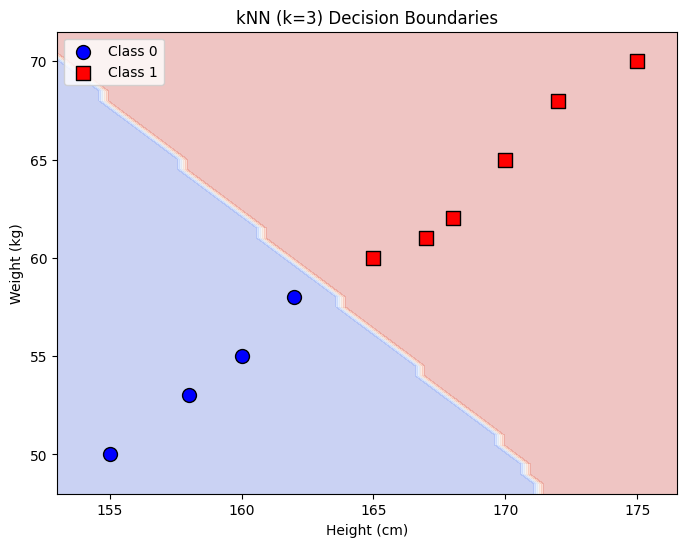

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dataset: (height, weight, class)
data = [
    (165, 60, 1),
    (170, 65, 1),
    (160, 55, 0),
    (175, 70, 1),
    (155, 50, 0),
    (168, 62, 1),
    (162, 58, 0),
    (172, 68, 1),
    (158, 53, 0),
    (167, 61, 1),
]

k = 3

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def knn(train, test_point, k):
    distances = []
    for item in train:
        dist = euclidean_distance(test_point, item[:2])
        distances.append((dist, item[2]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    votes = {}
    for _, label in neighbors:
        votes[label] = votes.get(label, 0) + 1
    return max(votes, key=votes.get)

# Prepare data for plotting
X = np.array([(pt[0], pt[1]) for pt in data])
y = np.array([pt[2] for pt in data])

# Define bounds of the plot
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2

# Create a grid of points with distance 0.5 between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

# Predict class for each grid point
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = []
for point in grid_points:
    pred = knn(data, point, k)
    Z.append(pred)
Z = np.array(Z).reshape(xx.shape)

# Plot decision boundary by assigning a color to each point in the meshgrid
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot training points
for label, color, marker in zip([0,1], ['blue', 'red'], ['o', 's']):
    plt.scatter(X[y == label, 0], X[y == label, 1],
                c=color, label=f'Class {label}', edgecolor='k', marker=marker, s=100)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title(f'kNN (k={k}) Decision Boundaries')
plt.legend()
plt.show()
